<a href="https://colab.research.google.com/github/Timadegbite/HEALTHCARE-ACCESSIBILITY-/blob/main/2km_5km_service_area_health_facilty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install geopandas
!pip install folium
!pip install openrouteservice
!pip install contextily
!pip install matplotlib
!pip install shapely
!pip install pandas

In [4]:
import pandas as pd
import geopandas as gpd
import folium
from folium import plugins
import openrouteservice as ors
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import contextily as ctx

# Load your Shagari health facilities
health_df = pd.read_csv("shagari_facilities.csv")

print(f"✅ Loaded {len(health_df)} health facilities in Shagari LGA")
print(f"Columns: {health_df.columns.tolist()}")
print("\nFirst 5 facilities:")
print(health_df[['facility_name', 'ward', 'latitude', 'longitude']].head())

✅ Loaded 40 health facilities in Shagari LGA
Columns: ['OBJECTID', 'globalid', 'nhfr_uid', 'nhfr_facility_code', 'country', 'iso', 'state', 'lga', 'lga_name_disagreement', 'ward', 'ward_name_disagreement', 'facility_name', 'facility_name_source', 'ownership', 'ownership_type', 'facility_level', 'facility_level_option', 'latitude', 'longitude', 'geocoordinates_source', 'last_updated', 'x', 'y']

First 5 facilities:
                        facility_name        ward   latitude  longitude
0                 Kalangu Health Post  Sanyinawal  12.628589   4.935382
1             Runjin Kaka Health Post  Sanyinawal  12.575267   4.937177
2            Tungar Barki Health Post      Gangan  12.510921   5.069346
3  Kajiji Model Primary Health Center      Kajiji  12.539074   4.938211
4            Shagari General Hospital     Shagari  12.627788   4.988352


In [5]:
# Create geometry points from latitude/longitude
# Your data uses 'longitude' for x and 'latitude' for y
geometry = [Point(xy) for xy in zip(health_df['longitude'], health_df['latitude'])]

# Create GeoDataFrame
health_gdf = gpd.GeoDataFrame(
    health_df,
    geometry=geometry,
    crs="EPSG:4326"  # WGS84 coordinate system
)

print(f"✅ Created {len(health_gdf)} health facility points")
print(f"Coordinate reference system: {health_gdf.crs}")
health_gdf.head(3)

✅ Created 40 health facility points
Coordinate reference system: EPSG:4326


,OBJECTID,globalid,nhfr_uid,nhfr_facility_code,country,iso,state,lga,lga_name_disagreement,ward,...,ownership_type,facility_level,facility_level_option,latitude,longitude,geocoordinates_source,last_updated,x,y,geometry
0,10399,72483c2e-f15f-4df1-9af9-1e24a69f7b14,19893162.0,33/14/1/1/1/0014,Nigeria,NGA,Sokoto,Shagari,0,Sanyinawal,...,State Government,Primary,Health Post,12.628589,4.935382,GRID3_EHEALTH,2024-11-11,4.935382,12.628589,POINT (4.93538 12.62859)
1,10400,86c3aac5-a481-4d2e-9bc2-e9e5dd4ef026,62915007.0,33/14/1/1/1/0022,Nigeria,NGA,Sokoto,Shagari,0,Sanyinawal,...,State Government,Primary,Health Post,12.575267,4.937177,GRID3_EHEALTH,2024-11-11,4.937177,12.575267,POINT (4.93718 12.57527)
2,10404,e4f6f440-d50e-42ae-8027-dfcf98736952,33462310.0,33/14/1/1/1/0026,Nigeria,NGA,Sokoto,Shagari,0,Gangan,...,State Government,Primary,Health Post,12.510921,5.069346,GRID3_EHEALTH,2024-11-11,5.069346,12.510921,POINT (5.06935 12.51092)


In [6]:
import geopandas as gpd
# Load LGA boundary data
lga_df = gpd.read_file("/content/GRID3_NGA_-_Operational_LGA_Boundaries.shp")

In [7]:
print(lga_df.columns)

Index(['FID', 'globalid', 'uniq_id', 'timestamp', 'editor', 'lganame',
       'lgacode', 'statename', 'statecode', 'source', 'amapcode', 'Shape__Are',
       'Shape__Len', 'geometry'],
      dtype='object')


In [8]:
filtered_lga_df = lga_df[lga_df['lganame'] == 'Shagari']

In [9]:
filtered_lga_df["geometry"] = filtered_lga_df["geometry"].to_wkt()
filtered_lga_df.to_csv("shagria_lga.csv", index=False)

/tmp/ipython-input-274145251.py:1: UserWarning: Geometry column does not contain geometry.
  filtered_lga_df["geometry"] = filtered_lga_df["geometry"].to_wkt()
/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:1969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [10]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
from shapely import wkt # Import wkt module

lga_df = pd.read_csv("/content/shagria_lga.csv")

# The 'geometry' column in lga_df contains WKT string representations of polygons.
# Convert the WKT string back to a shapely Polygon object.
lga_polygon = wkt.loads(lga_df['geometry'].iloc[0]) # Assuming there's only one polygon for Shagari LGA

lga_gdf = gpd.GeoDataFrame({'geometry': [lga_polygon]}, crs="EPSG:4326")

In [11]:
# Replace with your actual API key
API_KEY = "eyJvcmciOiI1YjNjZTM1OTc4NTExMTAwMDFjZjYyNDgiLCJpZCI6IjJkMGNjZGE0ZDVhOTQzYjZiM2I4ZmIzMzM4YmY5NGJmIiwiaCI6Im11cm11cjY0In0="

# Initialize client
client = ors.Client(key=API_KEY)

print("✅ OpenRouteService connected")

✅ OpenRouteService connected


In [12]:
def create_isochrone(client, lat, lon, minutes):
    """
    Create an isochrone (service area) for a given point and time threshold
    """
    try:
        # Convert minutes to seconds
        seconds = minutes * 60

        # Request isochrone
        params = {
            'locations': [[lon, lat]],
            'range': [seconds],
            'range_type': 'time',
            'attributes': ['area'],
            'smoothing': 1,
            'interval': seconds
        }

        isochrone = client.isochrones(**params)

        # Extract polygon geometry
        coords = isochrone['features'][0]['geometry']['coordinates'][0]
        polygon = Polygon(coords)

        return polygon

    except Exception as e:
        print(f"  ❌ Error: {e}")
        return None

print("🏥 Generating service areas for health facilities...")
print("=" * 60)

service_areas_2km = []
service_areas_5km = []
facility_names = []
facility_wards = []

for idx, row in health_gdf.iterrows():
    name = row['facility_name'] if pd.notna(row['facility_name']) else f"Facility_{idx}"
    ward = row['ward'] if pd.notna(row['ward']) else "Unknown"
    lat = row['latitude']
    lon = row['longitude']

    print(f"Processing: {name}")
    print(f"  📍 Ward: {ward}")
    print(f"  📌 Location: ({lat:.5f}, {lon:.5f})")

    # 2km service area (~15-20 min walking)
    area_2km = create_isochrone(client, lat, lon, 15)
    if area_2km:
        service_areas_2km.append(area_2km)
        facility_names.append(name)
        facility_wards.append(ward)
        print(f"  ✅ 2km service area created")
    else:
        # Fallback: simple buffer
        buffer_2km = Point(lon, lat).buffer(0.018)  # ~2km in degrees
        service_areas_2km.append(buffer_2km)
        facility_names.append(name)
        facility_wards.append(ward)
        print(f"  ⚠️ Using fallback buffer for 2km")

    # 5km service area (~30-40 min walking)
    area_5km = create_isochrone(client, lat, lon, 30)
    if area_5km:
        service_areas_5km.append(area_5km)
        print(f"  ✅ 5km service area created")
    else:
        # Fallback: simple buffer
        buffer_5km = Point(lon, lat).buffer(0.045)  # ~5km in degrees
        service_areas_5km.append(buffer_5km)
        print(f"  ⚠️ Using fallback buffer for 5km")

    print("-" * 60)

🏥 Generating service areas for health facilities...
Processing: Kalangu Health Post
  📍 Ward: Sanyinawal
  📌 Location: (12.62859, 4.93538)
  ✅ 2km service area created
  ✅ 5km service area created
------------------------------------------------------------
Processing: Runjin Kaka Health Post
  📍 Ward: Sanyinawal
  📌 Location: (12.57527, 4.93718)
  ✅ 2km service area created
  ✅ 5km service area created
------------------------------------------------------------
Processing: Tungar Barki Health Post
  📍 Ward: Gangan
  📌 Location: (12.51092, 5.06935)
  ✅ 2km service area created
  ✅ 5km service area created
------------------------------------------------------------
Processing: Kajiji Model Primary Health Center
  📍 Ward: Kajiji
  📌 Location: (12.53907, 4.93821)
  ✅ 2km service area created
  ✅ 5km service area created
------------------------------------------------------------
Processing: Shagari General Hospital
  📍 Ward: Shagari
  📌 Location: (12.62779, 4.98835)
  ✅ 2km service are

/usr/local/lib/python3.12/dist-packages/openrouteservice/client.py:211: UserWarning: Rate limit exceeded. Retrying for the 1st time.
  warnings.warn('Rate limit exceeded. Retrying for the {0}{1} time.'.format(retry_counter + 1,
/usr/local/lib/python3.12/dist-packages/openrouteservice/client.py:211: UserWarning: Rate limit exceeded. Retrying for the 2nd time.
  warnings.warn('Rate limit exceeded. Retrying for the {0}{1} time.'.format(retry_counter + 1,
/usr/local/lib/python3.12/dist-packages/openrouteservice/client.py:211: UserWarning: Rate limit exceeded. Retrying for the 3rd time.
  warnings.warn('Rate limit exceeded. Retrying for the {0}{1} time.'.format(retry_counter + 1,


  ✅ 2km service area created
  ✅ 5km service area created
------------------------------------------------------------
Processing: Rugga Mallam Health Post
  📍 Ward: Dandin Mahe
  📌 Location: (12.70453, 5.08884)
  ✅ 2km service area created
  ✅ 5km service area created
------------------------------------------------------------
Processing: Dandin Mahe Model Primary Health Center
  📍 Ward: Dandin Mahe
  📌 Location: (12.73451, 5.11787)


/usr/local/lib/python3.12/dist-packages/openrouteservice/client.py:211: UserWarning: Rate limit exceeded. Retrying for the 4th time.
  warnings.warn('Rate limit exceeded. Retrying for the {0}{1} time.'.format(retry_counter + 1,
/usr/local/lib/python3.12/dist-packages/openrouteservice/client.py:211: UserWarning: Rate limit exceeded. Retrying for the 5th time.
  warnings.warn('Rate limit exceeded. Retrying for the {0}{1} time.'.format(retry_counter + 1,
/usr/local/lib/python3.12/dist-packages/openrouteservice/client.py:211: UserWarning: Rate limit exceeded. Retrying for the 6th time.
  warnings.warn('Rate limit exceeded. Retrying for the {0}{1} time.'.format(retry_counter + 1,
/usr/local/lib/python3.12/dist-packages/openrouteservice/client.py:211: UserWarning: Rate limit exceeded. Retrying for the 7th time.
  warnings.warn('Rate limit exceeded. Retrying for the {0}{1} time.'.format(retry_counter + 1,
/usr/local/lib/python3.12/dist-packages/openrouteservice/client.py:211: UserWarning: Rat

  ✅ 2km service area created
  ✅ 5km service area created
------------------------------------------------------------
Processing: Dutsi Gwanmana Health Post
  📍 Ward: Dandin Mahe
  📌 Location: (12.68605, 5.12670)
  ✅ 2km service area created
  ✅ 5km service area created
------------------------------------------------------------
Processing: Mabera Health Post
  📍 Ward: Dandin Mahe
  📌 Location: (12.75033, 5.13424)
  ✅ 2km service area created
  ✅ 5km service area created
------------------------------------------------------------
Processing: Horo Danbaro Health Post
  📍 Ward: Horo
  📌 Location: (12.74182, 5.15878)
  ✅ 2km service area created
  ✅ 5km service area created
------------------------------------------------------------
Processing: Sullubawa Health Post
  📍 Ward: Kambama
  📌 Location: (12.61408, 5.24083)
  ✅ 2km service area created
  ✅ 5km service area created
------------------------------------------------------------
Processing: Jan Dutsi Health Post
  📍 Ward: Lambara

In [13]:
# 2km service areas
gdf_2km = gpd.GeoDataFrame({
    'geometry': service_areas_2km,
    'facility_name': facility_names[:len(service_areas_2km)],
    'ward': facility_wards[:len(service_areas_2km)],
    'buffer_km': 2
}, crs="EPSG:4326")

# 5km service areas
gdf_5km = gpd.GeoDataFrame({
    'geometry': service_areas_5km,
    'facility_name': facility_names[:len(service_areas_5km)],
    'ward': facility_wards[:len(service_areas_5km)],
    'buffer_km': 5
}, crs="EPSG:4326")

print(f"✅ Created {len(gdf_2km)} 2km service areas")
print(f"✅ Created {len(gdf_5km)} 5km service areas")

✅ Created 40 2km service areas
✅ Created 40 5km service areas


In [14]:
# Calculate center of Shagari LGA
center_lat = health_gdf.geometry.y.mean()
center_lon = health_gdf.geometry.x.mean()

# Create base map
m = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=11,
    tiles='OpenStreetMap',
    control_scale=True
)

# 1. Add LGA boundary (if available)
if 'lga_gdf' in locals():
    folium.GeoJson(
        lga_gdf.geometry[0],
        name='Shagari LGA',
        style_function=lambda x: {
            'fillColor': 'none',
            'color': 'black',
            'weight': 3,
            'dashArray': '5, 5'
        },
        tooltip='Shagari Local Government Area'
    ).add_to(m)

# 2. Add 2km service areas (light green)
folium.GeoJson(
    gdf_2km.geometry,
    name='2km Service Area (15 min walk)',
    style_function=lambda x: {
        'fillColor': '#90EE90',
        'color': '#228B22',
        'weight': 1,
        'fillOpacity': 0.4
    },
    tooltip='2km reachable area'
).add_to(m)

# 3. Add 5km service areas (light orange/peach)
folium.GeoJson(
    gdf_5km.geometry,
    name='5km Service Area (30 min walk)',
    style_function=lambda x: {
        'fillColor': '#FFD700',
        'color': '#FF8C00',
        'weight': 1,
        'fillOpacity': 0.3
    },
    tooltip='5km reachable area'
).add_to(m)

# 4. Add health facility points with popup information
for idx, row in health_gdf.iterrows():
    name = row['facility_name'] if pd.notna(row['facility_name']) else "Unnamed Facility"
    ward = row['ward'] if pd.notna(row['ward']) else "Unknown"
    level = row['facility_level'] if pd.notna(row['facility_level']) else "Not specified"
    ownership = row['ownership'] if pd.notna(row['ownership']) else "Unknown"

    # Create popup HTML
    popup_html = f"""
    <div style="font-family: Arial; width: 250px;">
        <b style="font-size: 14px; color: #2c3e50;">{name}</b><br>
        <hr style="margin: 5px 0;">
        <b>📍 Ward:</b> {ward}<br>
        <b>🏥 Level:</b> {level}<br>
        <b>🏛️ Ownership:</b> {ownership}<br>
        <b>📌 Coordinates:</b> {row['latitude']:.5f}, {row['longitude']:.5f}<br>
    </div>
    """

    # Choose icon color based on facility level
    if 'General Hospital' in str(name) or 'Secondary' in str(row['facility_level']):
        icon_color = 'red'
        icon_type = 'hospital'
    elif 'Primary Health Center' in str(row['facility_level_option']):
        icon_color = 'orange'
        icon_type = 'plus-circle'
    else:
        icon_color = 'blue'
        icon_type = 'medkit'

    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_html, max_width=300),
        tooltip=name,
        icon=folium.Icon(color=icon_color, icon=icon_type, prefix='fa')
    ).add_to(m)

# 5. Add heatmap of facility density
heat_data = [[row['latitude'], row['longitude']] for idx, row in health_gdf.iterrows()]
plugins.HeatMap(heat_data, radius=15, blur=10, max_zoom=10, name='Facility Density').add_to(m)

# 6. Add legend
legend_html = '''
<div style="position: fixed;
     bottom: 50px; left: 50px; width: 240px; height: auto;
     background-color: white; border:2px solid grey; z-index:9999;
     font-size:12px; padding: 12px;
     border-radius: 10px; box-shadow: 2px 2px 10px rgba(0,0,0,0.5);
     font-family: Arial;">
     <b style="font-size: 14px; color: #2c3e50;">📊 LEGEND - Shagari LGA</b><br>
     <hr style="margin: 5px 0 10px 0;">
     <div style="display: flex; align-items: center; margin-bottom: 5px;">
         <div style="background: #90EE90; width: 20px; height: 20px; border: 1px solid #228B22; margin-right: 8px;"></div>
         <span><b>2km Service Area</b> (15 min walk)</span>
     </div>
     <div style="display: flex; align-items: center; margin-bottom: 5px;">
         <div style="background: #FFD700; width: 20px; height: 20px; border: 1px solid #FF8C00; margin-right: 8px;"></div>
         <span><b>5km Service Area</b> (30 min walk)</span>
     </div>
     <div style="display: flex; align-items: center; margin-bottom: 5px;">
         <div style="border: 2px dashed black; width: 20px; height: 20px; margin-right: 8px;"></div>
         <span><b>LGA Boundary</b> (Shagari)</span>
     </div>
     <hr style="margin: 10px 0 5px 0;">
     <div style="display: flex; align-items: center; margin-bottom: 3px;">
         <span style="color: red; font-size: 16px; margin-right: 8px;">🏥</span>
         <span><b>General Hospital</b> (Secondary)</span>
     </div>
     <div style="display: flex; align-items: center; margin-bottom: 3px;">
         <span style="color: orange; font-size: 16px; margin-right: 8px;">🏥</span>
         <span><b>Primary Health Center</b></span>
     </div>
     <div style="display: flex; align-items: center; margin-bottom: 3px;">
         <span style="color: blue; font-size: 16px; margin-right: 8px;">🏥</span>
         <span><b>Health Post</b></span>
     </div>
     <hr style="margin: 10px 0 5px 0;">
     <div style="display: flex; align-items: center;">
         <span style="background: linear-gradient(to right, blue, green, yellow, red); width: 30px; height: 10px; margin-right: 8px;"></span>
         <span><b>Facility Density</b> (Heatmap)</span>
     </div>
     <hr style="margin: 10px 0 5px 0;">
     <p style="margin: 5px 0 0 0; font-size: 10px; color: #7f8c8d;">
         Data: NHFR_2024, GRID3_EHEALTH<br>
         Analysis: OpenRouteService<br>
         Generated: February 2026
     </p>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# 7. Add fullscreen button and layer control
plugins.Fullscreen().add_to(m)
folium.LayerControl().add_to(m)

# 8. Save map
m.save('shagari_lga_health_service_areas.html')
print("✅ Interactive map saved as 'shagari_lga_health_service_areas.html'")

# Display in notebook
m

✅ Interactive map saved as 'shagari_lga_health_service_areas.html'


In [15]:
# Save 2km Service area
gdf_2km.to_file("shagari_lga_2km_service_areas.geojson", driver="GeoJSON")

# Save 5km service area
gdf_5km.to_file("shagari_lga_5km_service_areas.geojson", driver="GeoJSON")
print("service area files saved successfully!")

service area files saved successfully!


In [16]:
# Reproject to metric CRS for accurate area calculation
if 'lga_gdf' in locals():
    lga_metric = lga_gdf.to_crs('EPSG:3857')
    lga_area = lga_metric.area[0] / 1e6  # in km²

    # Calculate coverage for 2km
    gdf_2km_metric = gdf_2km.to_crs('EPSG:3857')
    coverage_2km = gdf_2km_metric.union_all()
    coverage_2km_area = coverage_2km.area / 1e6  # in km²

    # Calculate unique coverage (excluding overlaps counted multiple times)
    # For unique coverage, we dissolve all polygons into one
    dissolved_2km = gdf_2km_metric.dissolve()
    unique_coverage_2km_area = dissolved_2km.area[0] / 1e6

    # Calculate coverage for 5km
    gdf_5km_metric = gdf_5km.to_crs('EPSG:3857')
    coverage_5km = gdf_5km_metric.union_all()
    coverage_5km_area = coverage_5km.area / 1e6

    dissolved_5km = gdf_5km_metric.dissolve()
    unique_coverage_5km_area = dissolved_5km.area[0] / 1e6

    # Combined coverage (areas within 5km of any facility)
    combined_gdf = pd.concat([gdf_2km_metric, gdf_5km_metric])
    combined_gdf = gpd.GeoDataFrame(combined_gdf, crs='EPSG:3857')
    dissolved_combined = combined_gdf.dissolve()
    combined_coverage_area = dissolved_combined.area[0] / 1e6

    print("=" * 60)
    print("📊 SHAGARI LGA HEALTH FACILITY COVERAGE ANALYSIS")
    print("=" * 60)
    print(f"📍 Total LGA Area: {lga_area:.2f} km²")
    print(f"🏥 Total Health Facilities: {len(health_gdf)}")
    print(f"\n📈 2km Service Areas:")
    print(f"   • Total coverage (with overlaps): {coverage_2km_area:.2f} km²")
    print(f"   • Unique coverage (without overlaps): {unique_coverage_2km_area:.2f} km²")
    print(f"   • Percentage of LGA: {(unique_coverage_2km_area / lga_area * 100):.1f}%")
    print(f"\n📈 5km Service Areas:")
    print(f"   • Total coverage (with overlaps): {coverage_5km_area:.2f} km²")
    print(f"   • Unique coverage (without overlaps): {unique_coverage_5km_area:.2f} km²")
    print(f"   • Percentage of LGA: {(unique_coverage_5km_area / lga_area * 100):.1f}%")
    print(f"\n📈 Combined Coverage (within 5km of any facility):")
    print(f"   • Unique coverage area: {combined_coverage_area:.2f} km²")
    print(f"   • Percentage of LGA: {(combined_coverage_area / lga_area * 100):.1f}%")

    # Calculate underserved areas
    underserved_area = lga_area - combined_coverage_area
    underserved_pct = (underserved_area / lga_area * 100)
    print(f"\n⚠️ Underserved Areas:")
    print(f"   • Area >5km from nearest facility: {underserved_area:.2f} km²")
    print(f"   • Percentage of LGA: {underserved_pct:.1f}%")
    print("=" * 60)

else:
    print("⚠️ LGA boundary not available - skipping coverage statistics")

📊 SHAGARI LGA HEALTH FACILITY COVERAGE ANALYSIS
📍 Total LGA Area: 1447.13 km²
🏥 Total Health Facilities: 40

📈 2km Service Areas:
   • Total coverage (with overlaps): 252.07 km²
   • Unique coverage (without overlaps): 252.07 km²
   • Percentage of LGA: 17.4%

📈 5km Service Areas:
   • Total coverage (with overlaps): 1287.09 km²
   • Unique coverage (without overlaps): 1287.09 km²
   • Percentage of LGA: 88.9%

📈 Combined Coverage (within 5km of any facility):
   • Unique coverage area: 1291.51 km²
   • Percentage of LGA: 89.2%

⚠️ Underserved Areas:
   • Area >5km from nearest facility: 155.62 km²
   • Percentage of LGA: 10.8%


In [17]:
# Export health facilities
health_gdf.to_file("shagari_health_facilities.geojson", driver="GeoJSON")
print("✅ Exported: shagari_health_facilities.geojson")

# Export service areas
gdf_2km.to_file("shagari_2km_service_areas.geojson", driver="GeoJSON")
print("✅ Exported: shagari_2km_service_areas.geojson")

gdf_5km.to_file("shagari_5km_service_areas.geojson", driver="GeoJSON")
print("✅ Exported: shagari_5km_service_areas.geojson")

# Export LGA boundary if available
if 'lga_gdf' in locals():
    lga_gdf.to_file("shagari_lga_boundary.geojson", driver="GeoJSON")
    print("✅ Exported: shagari_lga_boundary.geojson")

# Export summary statistics
summary_stats = {
    'Metric': [
        'Total Health Facilities',
        '2km Coverage Area (km²)',
        '2km Coverage (%)',
        '5km Coverage Area (km²)',
        '5km Coverage (%)',
        'Underserved Area (km²)',
        'Underserved (%)'
    ],
    'Value': [
        len(health_gdf),
        f"{unique_coverage_2km_area:.2f}" if 'unique_coverage_2km_area' in locals() else 'N/A',
        f"{(unique_coverage_2km_area / lga_area * 100):.1f}%" if 'unique_coverage_2km_area' in locals() else 'N/A',
        f"{unique_coverage_5km_area:.2f}" if 'unique_coverage_5km_area' in locals() else 'N/A',
        f"{(unique_coverage_5km_area / lga_area * 100):.1f}%" if 'unique_coverage_5km_area' in locals() else 'N/A',
        f"{underserved_area:.2f}" if 'underserved_area' in locals() else 'N/A',
        f"{underserved_pct:.1f}%" if 'underserved_pct' in locals() else 'N/A'
    ]
}

stats_df = pd.DataFrame(summary_stats)
stats_df.to_csv("shagari_coverage_statistics.csv", index=False)
print("✅ Exported: shagari_coverage_statistics.csv")

print("\n🎉 All files exported successfully! Ready for QGIS.")

✅ Exported: shagari_health_facilities.geojson
✅ Exported: shagari_2km_service_areas.geojson
✅ Exported: shagari_5km_service_areas.geojson
✅ Exported: shagari_lga_boundary.geojson
✅ Exported: shagari_coverage_statistics.csv

🎉 All files exported successfully! Ready for QGIS.


/tmp/ipython-input-2547807130.py:24: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='upper right')


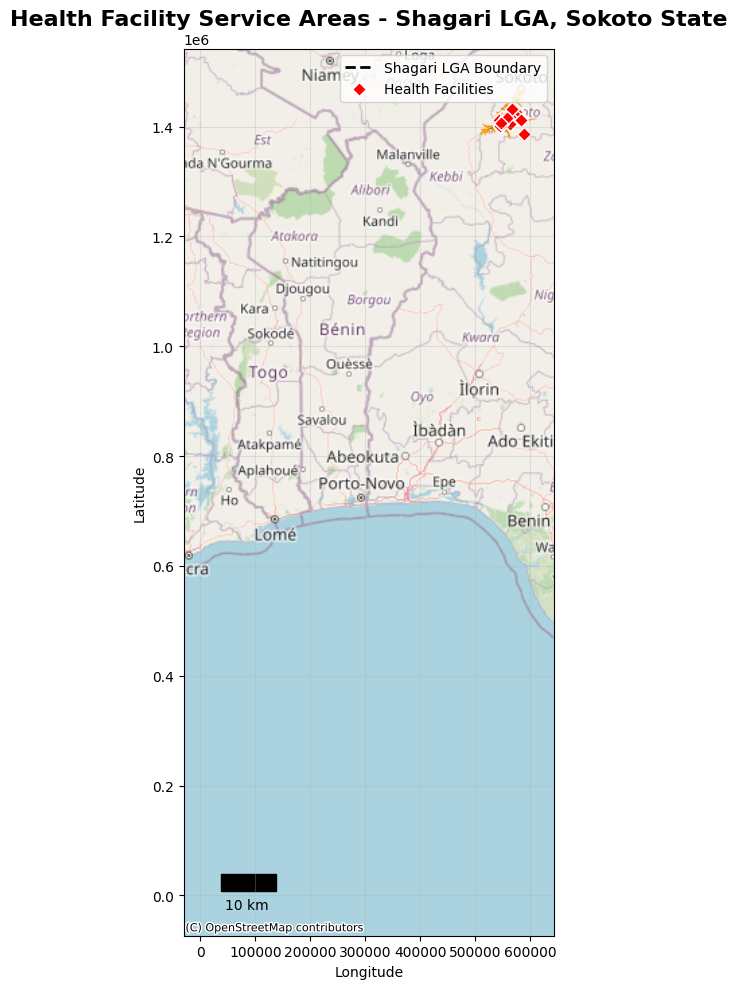

✅ Static map saved as 'shagari_health_service_areas_static.png'


In [18]:
# Create a static map for reports
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

if 'lga_gdf' in locals():
    # Plot LGA boundary
    lga_gdf.boundary.plot(ax=ax, color='black', linewidth=2, linestyle='--', label='Shagari LGA Boundary')

# Plot 5km service areas
gdf_5km.to_crs('EPSG:3857').plot(ax=ax, color='#FFD700', alpha=0.3, edgecolor='#FF8C00', linewidth=0.5, label='5km Service Area')

# Plot 2km service areas
gdf_2km.to_crs('EPSG:3857').plot(ax=ax, color='#90EE90', alpha=0.4, edgecolor='#228B22', linewidth=0.5, label='2km Service Area')

# Plot health facilities
health_gdf.to_crs('EPSG:3857').plot(ax=ax, color='red', markersize=50, marker='D', edgecolor='white', linewidth=1, label='Health Facilities')

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize
ax.set_title('Health Facility Service Areas - Shagari LGA, Sokoto State', fontsize=16, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

# Add scale bar (approximate)
from matplotlib.patches import Rectangle
ax.add_patch(Rectangle((0.1, 0.05), 0.15, 0.02, transform=ax.transAxes, color='black'))
ax.text(0.17, 0.03, '10 km', transform=ax.transAxes, ha='center')

plt.tight_layout()
plt.savefig('shagari_health_service_areas_static.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Static map saved as 'shagari_health_service_areas_static.png'")